<h1>Trabajo Práctico Integrador Final</h1>

<h3>Opción 1: TP sobre aprendizaje no supervisado.</h3>

<p>A continuación, se realiza un análisis de componentes principales (PCA) sobre el dataset de vinos de sklearn. Se consideraron dos situaciones:
    <ol>
        <li> Sin escalar los datos de entrada.</li>
        <li> Escalando los datos de entrada.</li>
    </ol>
</p>
<p>Para evaluar los datos transformados en las situaciones propuestas, se utilizará GNB para las predicciones. </p>

<h4> Importo las bibliotecas y los módulos necesarios para el trabajo </h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn import metrics

<h4>Visualizo el dataset expresándolo en la estructura de un DataFrame de pandas</h4> 

In [2]:
data = load_wine()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['type'] = pd.Series(data.target)

In [4]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


<h4>Utilizo tuple unpacking</h4>
<p>Separo las variables independientes de la dependiente en estructuras de datos ndarry de NumPy.</p>

In [6]:
features, target = load_wine(return_X_y=True)

In [7]:
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

<h4>Separo el set de datos en en conjuntos de prueba y de entrenamiento</h4>
<p>Dividir la tabla de datos en dos conjuntos permite entrenar el algoritmo y luego evaluar el poder predictivo del mismo con datos que el modelo nunca vio anteriormente.</p>

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42)

<h4>Estudio el número de componentes necesarias para explicar la varianza de cada feature en el dataset</h4>

<p>Para obtener el número de componentes necesarias que explican la varianza del dataset, procedo en primer lugar a definir un objeto "scaler" para estandarizar los datos.<p>

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(features)

StandardScaler()

In [12]:
features_transformed = scaler.transform(features)

In [13]:
features_transformed

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

<p>Con los datos escalados, procedo a aplicar .fit con PCA. Esto me permite ver el valor de la varianza explicada de las 13 componentes</p> 
<p>Luego, realizo un gráfico que me permite observar la varianza acumulada. En el mismo, puede visualizarse que para tener un 95% de varianza explicada, necesito 10 dimensiones.</p>

In [14]:
pca = PCA().fit(features_transformed)

In [15]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

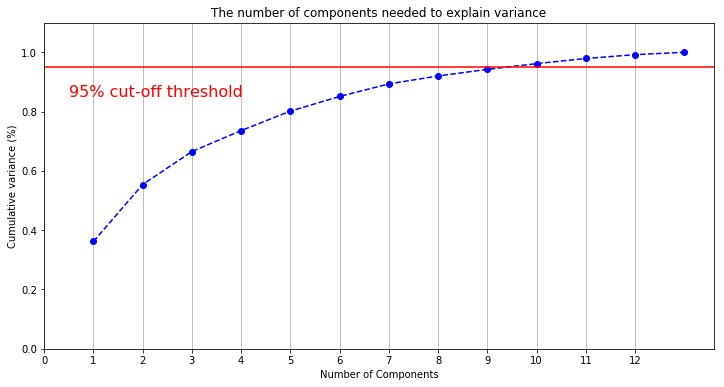

In [16]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 14, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 13, step=1)) 
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

<h4>Creo las pipelines para evaluar la eficacia del algoritmo en función de los datos de entrada</h4>

<p>Creo dos pipelines: la primera sin escalar los datos y la segunda con los datos escalados.</p>

In [17]:
# Ajusto los datos y predigo utilizando un pipeline con PCA y GNB.
unscaled_clf = make_pipeline(PCA(n_components=0.95), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

In [18]:
# Ajusto los datos y predigo utilizando un pipeline con datos escalados, PCA y GNB.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=0.95), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

In [19]:
# Muestro la precisión de la predicción para los datos escalados y sin escalar.
print('\nPrecisión de la predicción para los datos de entrada sin estandarizar.')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrecisión de la predicción para los datos de entrada estandarizados.')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Precisión de la predicción para los datos de entrada sin estandarizar.
75.93%


Precisión de la predicción para los datos de entrada estandarizados.
100.00%



In [20]:
# Extraigo el PCA de las pipeline creadas.
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Muestro las dos componentes principales por motivos comparativos.
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])


PC 1 without scaling:
 [ 1.76342917e-03 -8.35544737e-04  1.54623496e-04 -5.31136096e-03
  2.01663336e-02  1.02440667e-03  1.53155502e-03 -1.11663562e-04
  6.31071580e-04  2.32645551e-03  1.53606718e-04  7.43176482e-04
  9.99775716e-01]

PC 1 with scaling:
 [ 0.13443023 -0.25680248 -0.0113463  -0.23405337  0.15840049  0.39194918
  0.41607649 -0.27871336  0.33129255 -0.11383282  0.29726413  0.38054255
  0.27507157]


<h3>Conclusión</h3>

<p>Se observa que la precisión del clasificador Gaussian naive Bayes aumentó de 75.93% a 100%. La diferencia se encontró en que en un caso se escaló el dataset y en el otro no. El proceso de estandarización es fundamental para ML. En el mismo, se genera que la media de cada feature en particular sea 0 y que la desviación estándar sea 1. Esto se logra restando la media de la variable y dividiendo por la desviación estándar (se aplica a cada dato de la columna en cuestión).</p>
<p>Feature scaling permite que la evaluación de la varianza por PCA no se sesgue por las escalas respectivas en cada feature. Si una variable varía menos que otra debido a su escala, el análisis por PCA llegará a una conclusión errónea. Un ejemplo de esto puede ser el peso y la altura de los humanos. Si no se escala la información, por PCA se observará que es principal la varianza explicada del peso, generando que sea de mayor importancia un kilo de diferencia que un metro.</p>
<p>Por tanto, se concluye que estandarizar la información es fundamental antes de realizar un PCA. Esto mejora sustancialmente la precisión de las predicciones.</p>